### Feature selection:
1. Removing low variance features (as they are similar to constant) using VarianceThreshold
2. Removing high correlated features using Pearson correlation with df.corr()
3. Using Univeriate feature selection with a target (scoring methods such as Mutual info, ANOVA F-test and Chi_square

### Get data

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [22]:
data = fetch_california_housing()
X = data["data"]
y = data["target"]
col_names = data["feature_names"]

In [23]:
X.shape, y.shape, len(col_names)

((20640, 8), (20640,), 8)

In [24]:
# Convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)
df.shape

(20640, 8)

In [25]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Generate fake columns

In [26]:
# Create a fake highly correlated column of MedInc
df.loc[:,"MedInc_Sqrt"] = df["MedInc"].apply(np.sqrt)
# Create another fake highly correlated column of AveRooms
df.loc[:,"AveRooms_Square"] = df["AveRooms"].apply(lambda x: x**2)

In [27]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt,AveRooms_Square
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.885342,48.778030
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.881215,38.914354
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.693956,68.693192
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2.375521,33.841580
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.961173,39.461681


In [28]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt,AveRooms_Square
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329,0.039825
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797,-0.030275
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688,0.762586
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910,0.810434
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415,-0.034238
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266,-0.001693
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303,0.039000
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569,-0.002830
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000,0.038510
AveRooms_Square,0.039825,-0.030275,0.762586,0.810434,-0.034238,-0.001693,0.039000,-0.002830,0.038510,1.000000


### Remove low variance features

In [32]:
from sklearn.feature_selection import VarianceThreshold

In [38]:
# Check data variance
df.var()

MedInc             3.609323e+00
HouseAge           1.583963e+02
AveRooms           6.121533e+00
AveBedrms          2.245915e-01
Population         1.282470e+06
AveOccup           1.078700e+02
Latitude           4.562293e+00
Longitude          4.014139e+00
MedInc_Sqrt        2.039401e-01
AveRooms_Square    4.054617e+04
dtype: float64

In [39]:
threshold = 0.25
df.var() < threshold

MedInc             False
HouseAge           False
AveRooms           False
AveBedrms           True
Population         False
AveOccup           False
Latitude           False
Longitude          False
MedInc_Sqrt         True
AveRooms_Square    False
dtype: bool

In [46]:
cols = [c for c in df.columns if df[c].var() >= threshold]
cols

['MedInc',
 'HouseAge',
 'AveRooms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'AveRooms_Square']

In [48]:
# Remove columns with low variance
var_thresh = VarianceThreshold(threshold=threshold)
df_trfm = var_thresh.fit_transform(df)
df_trfm = pd.DataFrame(df_trfm, columns=cols)
df_trfm.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,AveRooms_Square
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,48.778030
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,38.914354
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,68.693192
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,33.841580
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,39.461681


### Univeriate feature selection

In [49]:
from sklearn.feature_selection import chi2, f_classif, f_regression, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [52]:
class UnivariateFeatureSelection:
    def __init__(self, n_features, problem_type, scoring):
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2, # Only for non-negative data
                "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
            }
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
        
        if isinstance(n_features, int):
            self.selection = SelectKBest(valid_scoring[scoring], k=n_features)
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(valid_scoring[scoring], percentile=int(n_features * 100))
        else:
            raise Exception("Invalid type of feature")
            
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    def transform(self, X):
        return self.selection.transform(X)
    
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)
    


In [55]:
# Example 1
print(X.shape, y.shape)
ufs = UnivariateFeatureSelection(n_features=0.5, problem_type="regression", scoring="f_regression")
ufs.fit(X, y)
X_transformed = ufs.transform(X)
print(X_transformed.shape)

(20640, 8) (20640,)
(20640, 4)


In [57]:
# Example 2
print(X.shape, y.shape)
ufs = UnivariateFeatureSelection(n_features=6, problem_type="regression", scoring="mutual_info_regression")
ufs.fit(X, y)
X_transformed = ufs.transform(X)
print(X_transformed.shape)

(20640, 8) (20640,)
(20640, 6)


### Greedy feature selection

In [59]:
import pandas as pd
from sklearn import linear_model, metrics
from sklearn.datasets import make_classification

In [75]:
class GreedyFeatureSelection:
    """ A simple class for greedy feature selection """
    def evaluate_score(self, X, y):
        """
        Evaluate model on data using Area Under ROC Curve (AUC)
        :param X: training data
        :param y: targets
        :return: auc
        """
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, predictions)
        return auc
    
    def _feature_selection(self, X, y):
        """
        The greedy selection function
        :param X: data, numpy array
        :param y: targets, numpy array
        :return: (best scores, best features)
        """
        best_scores = []
        best_features = []
        num_features = X.shape[1]
        while True:
            this_feature = None
            best_score = 0
            for feature in range(num_features):
                if feature in best_features:
                    continue
                selected_features = best_features + [feature]
                xtrain = X[:, selected_features]
                score = self.evaluate_score(xtrain, y)
                if score > best_score:
                    this_feature =feature
                    best_score = score
            # Add the selected feature into best_features
            if this_feature != None:
                best_features.append(this_feature)
                best_scores.append(best_score)
            # Exit if not improve score
            if len(best_scores) > 2:
                if  best_scores[-1] < best_scores[-2]:
                    break
        return best_scores[:-1], best_features[:-1]
    
    def __call__(self, X, y):
        scores, features = self._feature_selection(X, y)
        return X[:, features], scores    


In [76]:
# Testing
X, y = make_classification(n_samples=1000, n_features=100)

In [77]:
X_trfm, scores = GreedyFeatureSelection()(X,y)

### Greedy with Recursive feature elimination (RFE)

In [80]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [81]:
data = fetch_california_housing()
X = data["data"]
y = data["target"]
cols = data["feature_names"]

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [82]:
X_trfm = rfe.transform(X)

In [83]:
X.shape, X_trfm.shape

((20640, 8), (20640, 3))

### Feature importance with RF

In [86]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

In [87]:
# Get data
data = load_diabetes()
X = data["data"]
y = data["target"]
cols = data["feature_names"]
# Train model
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

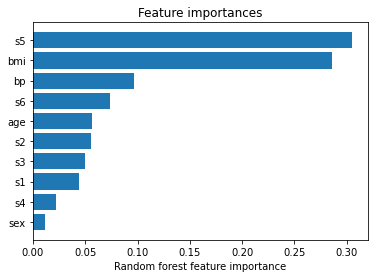

In [90]:
import matplotlib.pyplot as plt
# Get importance features
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title("Feature importances")
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [cols[i] for i in idxs])
plt.xlabel("Random forest feature importance")
plt.show()

### Select From Model

In [91]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [92]:
# Get data
data = load_diabetes()
X = data["data"]
y = data["target"]
cols = data["feature_names"]
# Train model
model = RandomForestRegressor()
sfm = SelectFromModel(estimator=model)
X_trfm = sfm.fit_transform(X, y)


In [93]:
# Check selected features
support = sfm.get_support()
[x for x, y in zip(cols, support) if y == True]

['bmi', 's5']